<h1 style="text-align: center; font-size: 35px">Programme de Terminale - Algorithmes à connaître</h1>

Voici la liste des algorithmes au programme de Terminale à connaître :

- [Algorithmes sur les arbres binaires et sur les arbres binaires de recherche](#Algorithmes-sur-les-arbres-binaires-et-sur-les-arbres-binaires-de-recherche)
    - [Calculer la taille et la hauteur d'un arbre](#Calculer-la-taille-et-la-hauteur-d'un-arbre)
    - [Parcourir un arbre de différentes façons](#Parcourir-un-arbre-de-différentes-façons) (ordres infixe, préfixe ou suffixe ; ordre en largeur d’abord).
    - [Rechercher une clé dans un arbre binaire de recherche](#Rechercher-une-clé-dans-un-ABR)
    - [Insérer une clé dans un arbre binaire de recherche](#Insérer-une-clé-dans-un-ABR)
- [Algorithmes sur les graphes](#Algorithmes-sur-les-graphes)
    - [Parcourir un graphe en profondeur d'abord, en largeur d'abord](#Parcourir-un-graphe-en-profondeur-d'abord,-en-largeur-d'abord)
    - [Repérer la présence d'un cycle dans un graphe](#Repérer-la-présence-d'un-cycle-dans-un-graphe)
    - [Chercher un chemin dans un graphe](#Chercher-un-chemin-(ou-une-chaîne)-dans-un-graphe)
    - [(Distance entre deux sommets)](#(Distance-entre-deux-sommets))
- [Algorithmes de la méthode "Diviser pour régner"](#Algorithmes-de-la-méthode-"Diviser-pour-régner")
    - [Recherche dichotomique](#Recherche-dichotomique)
    - [Tri fusion](#Tri-fusion)
    - [Rotation d'un quart de tour d'une image avec un coût mémoire constant](#Rotation-d'un-quart-de-tour-d'une-image-(avec-coût-en-mémoire-constant))
- Algorithmes de programmation dynamique
    - Alignement de séquence
    - Rendu de monnaie
- Algorithme de recherche textuelle
    - Algorithme de Boyer Moore (étudier l'algorithme)

# Algorithmes sur les arbres binaires et sur les arbres binaires de recherche

On utilise l'implémentation des arbres binaires par la classe `Noeud` suivante.

In [1]:
class Noeud:
    def __init__(self, e, g=None, d=None):
        self.etiquette = e
        self.gauche = g
        self.droit = d

    def est_feuille(self):
        return not self.gauche and not self.droit
    
    # Une représentation possible de l'arbre
    def __repr__(self):
        ch = str(self.etiquette)
        if self.gauche or self.droit:
            ch = ch + '-(' + str(self.gauche) + ',' + str(self.droit) + ')'
        return ch

## Calculer la taille et la hauteur d'un arbre

### Taille d'un arbre

In [2]:
def taille(A):
    """Renvoie la taille d'un arbre binaire A."""
    if A is None:
        return 0
    else:
        return 1 + taille(A.gauche) + taille(A.droit)

In [3]:
A1 = Noeud(2, Noeud(8, Noeud(4), Noeud(5)), Noeud(9, None, Noeud(3)))
print(A1)
taille(A1)

2-(8-(4,5),9-(None,3))


6

### Hauteur d'un arbre

In [4]:
def hauteur(A):
    """Renvoie la hauteur d'un arbre binaire A"""
    if A is None:
        return -1
    else:
        return 1 + max(hauteur(A.gauche), hauteur(A.droit))

In [5]:
A1 = Noeud(2, Noeud(8, Noeud(4), Noeud(5)), Noeud(9, None, Noeud(3)))
print(A1)
hauteur(A1)

2-(8-(4,5),9-(None,3))


2

## Parcourir un arbre de différentes façons

### Parcours en largeur d'abord

Il faut utiliser une file pour traiter les noeuds et leurs fils. On utile l'implémentation objet suivante d'une file.

In [6]:
class File:
    def __init__(self):
        self.contenu = []
        
    def enfiler(self, element):
        self.contenu.append(element)
        
    def defiler(self):
        assert self.taille() != 0, "on ne peut pas défiler une file vide"
        return self.contenu.pop(0) # ou return self.contenu.pop(0) si l'opération défiler doit aussi renvoyer le sommet
    
    def premier(self):
        assert self.taille() != 0, "une file vide n'a pas de premier élément"
        p = self.defiler() # on dépile pour le récupérer
        self.enfiler(p)    # on le renfile pour garder la file intacte
        return p
    
    def taille(self):
        return len(self.contenu)
    
    __len__ = taille # pour pouvoir également utiliser len pour obtenir la longueur d'une file
    
    # pour représenter une file
    def __repr__(self):
        ch = ""
        for e in self.contenu:
            ch = ch + str(e) + ","
        ch = ch[:-1] # pour enlever la dernière virgule
        ch = "<" + ch + "<"
        return ch

**Principe du parcours en largeur d'un AB** :

- On enfile l'arbre de départ
- Tant que la file n'est pas vide :
    - on défile un élément
    - si celui-ci n'est pas un arbre vide :
        - on affiche son étiquette
        - on enfile ses fils gauche et droit (dont les racines sont les noeuds du niveau suivant)

La fonction suivante affiche les noeuds de l'arbre en suivant un parcours en largeur.

In [7]:
def parcours_en_largeur(A):
    """Affiche les étiquettes de l'arbre binaire A selon un parcours en largeur."""
    F = File()
    F.enfiler(A)
    while F.taille() != 0:
        a = F.defiler() # renvoie le sommet
        if a is not None:
            print(a.etiquette)
            F.enfiler(a.gauche)
            F.enfiler(a.droit)

Pour l'arbre `A1` suivant

![un arbre binaire](Theme5_Algorithmique/data/ab2.png)

on obtient :

In [8]:
A1 = Noeud(2, Noeud(8, Noeud(4), Noeud(5)), Noeud(9, None, Noeud(3)))
print("arbre binaire A1 :", A1)
print("parcours en largeur de A1 :")
parcours_en_largeur(A1)

arbre binaire A1 : 2-(8-(4,5),9-(None,3))
parcours en largeur de A1 :
2
8
9
4
5
3


### Parcours en profondeur : ordres préfixe, infixe, suffixe

**Principe du parcours en profondeur d'un AB** : 

- si l'arbre n'est pas vide, faire dans un certain ordre les trois choses suivantes :
    - afficher le noeud courant
    - parcourir récursivement le sous-arbre gauche
    - parcourir récursivement le sous-arbre droit. 

Selon l'ordre dans lequel on effectue ces trois choses, on obtient l'ordre préfixe, infixe ou suffixe :

In [9]:
def parcours_prefixe(A):
    """Affiche les étiquettes de l'arbre binaire A selon un parcours par ordre préfixe."""
    if A is not None:
        print(A.etiquette)         # le noeud courant est traité, puis son sous-arbre gauche et son sous-arbre droit
        parcours_prefixe(A.gauche)
        parcours_prefixe(A.droit)
        
def parcours_infixe(A):
    """Affiche les étiquettes de l'arbre binaire A selon un parcours par ordre infixe."""
    if A is not None:
        parcours_infixe(A.gauche) 
        print(A.etiquette)         # le noeud courant est traité entre son sous-arbre gauche et son sous-arbre droit
        parcours_infixe(A.droit)
        
def parcours_suffixe(A):
    """Affiche les étiquettes de l'arbre binaire A selon un parcours par ordre infixe."""
    if A is not None:
        parcours_suffixe(A.gauche)
        parcours_suffixe(A.droit)
        print(A.etiquette)         # le noeud courant est traité après son sous-arbre gauche et son sous-arbre droit

Avec l'arbre `A1` précédent, on obtient :

In [10]:
A1 = Noeud(2, Noeud(8, Noeud(4), Noeud(5)), Noeud(9, None, Noeud(3)))
print("arbre binaire A1 :", A1)
print("parcours prefixe de A1 :")
parcours_prefixe(A1)
print("parcours infixe de A1 :")
parcours_infixe(A1)
print("parcours suffixe de A1 :")
parcours_suffixe(A1)

arbre binaire A1 : 2-(8-(4,5),9-(None,3))
parcours prefixe de A1 :
2
8
4
5
9
3
parcours infixe de A1 :
4
8
5
2
9
3
parcours suffixe de A1 :
4
5
8
3
9
2


## Rechercher une clé dans un ABR

La propriété d'ordre en chaque noeud d'un ABR assure qu'il existe un unique chemin pour toute clé stockée : la comparaison en chaque noeud indique si la recherche doit être poursuivie à gauche ou à droite. La recherche est fructueuse si la clé est trouvée en un noeud; infructueuse s'il est aboutit à un sous-arbre vide.

Cela permet d'écrire facilement l'algorithme récursif de recherche d'une clé dans un ABR :

In [11]:
def etq_presente(A, e):
    """Renvoie True si l'étiquette e est présente dans l'ABR A, et False sinon."""
    if A is None:
        return False
    if e == A.etiquette:
        return True
    elif e < A.etiquette:
        return etq_presente(A.gauche, e)
    else:
        return etq_presente(A.droit, e)

In [12]:
A2 = Noeud(2, Noeud(1), Noeud(6, Noeud(4, Noeud(3), Noeud(5)), None))
print(A2)
etq_presente(A2, 3), etq_presente(A2, 7)

2-(1,6-(4-(3,5),None))


(True, False)

## Insérer une clé dans un ABR

Il faut insérer la clé à l'endroit où mène la recherche. La fonction proposée construit un *nouvel* arbre possédant les clés de l'arbre passé en paramètre **ainsi que** la clé à insérer. 

Selon la valeur de la clé, il faut l'insérer dans le sous-arbre gauche ou dans le sous-arbre droit. Si l'arbre de départ et vide, on crée un ABR dont la racine a pour clé celle à insérer.

In [13]:
def ajouter(A, e):
    if A is None:
        return Noeud(e, None, None)
    elif e <= A.etiquette:
        return Noeud(A.etiquette, ajouter(A.gauche, e), A.droit)
    else:
        return Noeud(A.etiquette, A.gauche, ajouter(A.droit, e))

On peut créer une ABR en insérant tour à tour des clés :

In [14]:
A4 = ajouter(None, 2)
print(A4)
A4 =  ajouter(A4, 1)
print(A4)
A4 = ajouter(A4, 5)
print(A4)
A4 = ajouter(A4, 3)
print(A4)

2
2-(1,None)
2-(1,5)
2-(1,5-(3,None))


Et on peut ajouter des clés à un ABR existant :

In [15]:
A2 = Noeud(2, Noeud(1), Noeud(6, Noeud(4, Noeud(3), Noeud(5)), None))
print(A2)
A2 = ajouter(A2, 0)
print(A2)
A2 = ajouter(A2, 2)
print(A2)

2-(1,6-(4-(3,5),None))
2-(1-(0,None),6-(4-(3,5),None))
2-(1-(0,2),6-(4-(3,5),None))


# Algorithmes sur les graphes

Pour les différents algorithmes sur les graphes on a besoin de *marquer* certains sommets. Pour uniformiser les pratiques et les algorithmes on a choisi d'utiliser un dictionnaire `visites` pour marquer les sommets. En modifiant l'utilisation de ce dictionnaire on peut écrire les différents algorithmes. 

## Parcourir un graphe en profondeur d'abord, en largeur d'abord

### Parcours en profondeur d'abord

On peut utiliser une **pile** pour stocker et traiter les sommets.

**Principe du parcours en profondeur** :

- On choisit un sommet de départ
- On l'empile
- Tant que la pile n'est pas vide :
    - On dépile son sommet
    - S'il n'a pas encore été visité on le marque et on empile tous ses voisins non encore visités
    - Sinon, on ne fait rien (on passe donc directement à l'itération suivante)

En stockant les sommets encore à visiter dans une **pile**, on s'assure que ce sont les derniers sommets découverts qui vont être visités en premier (LIFO, *Last In First Out*), cela correspond au parcours en profondeur.

Dans l'implémentation qui suit, on utilise une liste Python comme une pile avec les méthodes `append` (enfiler) et `pop` (pour défiler). Le sommet de la pile correspond donc au bout de la liste. Dans le dictionnaire `visites` on ajoute les sommets au fur et à mesure pour les marquer (valeur à `True`).

>On pourrait également utiliser une pile comme un objet d'une classe `Pile`, ou toute autre représentation d'un pile.

In [16]:
def parcours_prof(graphe, debut):
    visites = {}
    pile = [debut]         # on empile le sommet de départ
    while len(pile) > 0:
        s = pile.pop()     # on dépile le sommet
        if s in visites:   # si s a déjà été visité
            continue       # on passe à l'itération suivante
        visites[s] = True  # sinon l'itération en cours se poursuit
        for voisin in graphe[s]:
            if voisin not in visites:
                pile.append(voisin) # on empile tous ses voisins non encore visités
    return visites

En observant l'ordre d'ajout des clés dans le dictionnaire (*valable à partir de Python 3.7 !*), on peut voir l'ordre des sommets visités par ce parcours sur le graphe `g1` ci-dessous.

<img class="centre image-responsive" src="Theme5_Algorithmique/data/g1.png" alt="deux graphes">

In [17]:
g1 = {
    "A": ["B", "D"],
    "B": ["A", "C", "E"],
    "C": ["B", "E", "F", "G"],
    "D": ["A", "E"],
    "E": ["B", "C", "D"],
    "F": ["C"],
    "G": ["C"]    
}

parcours_prof(g1, "A") # A -> D -> E -> C -> G -> F -> B

{'A': True, 'D': True, 'E': True, 'C': True, 'G': True, 'F': True, 'B': True}

### Parcours en largeur d'abord

C'est simple, il suffit de remplace la pile par une file !

**Principe du parcours en largeur** :

- On choisit un sommet de départ
- On l'enfile
- Tant que la file n'est pas vide :
    - On défile son premier élément
    - S'il n'a pas encore été visité on le marque et on enfile tous ses voisins non encore visités
    - Sinon, on ne fait rien (on passe donc directement à l'itération suivante)

En stockant les sommets encore à visiter dans une **file**, on s'assure que ce sont les premiers sommets découverts qui vont être visités en premier (FIFO, *First In First Out*), cela correspond au parcours en largeur :

In [18]:
def parcours_larg(graphe, debut):
    visites = {}
    file = [debut]
    while len(file) > 0:
        s = file.pop(0)
        if s in visites:   # si s a déjà été visité
            continue       # on passe à l'itération suivante
        visites[s] = True  # sinon l'itération en cours se poursuit
        for voisin in graphe[s]:
            if voisin not in visites:
                file.append(voisin)
    return visites

En observant l'ordre d'ajout des clés dans le dictionnaire (*valable à partir de Python 3.7 !*), on peut voir l'ordre des sommets visités par ce parcours sur le graphe `g1` ci-dessous.

<img class="centre image-responsive" src="Theme5_Algorithmique/data/g1.png" alt="deux graphes">

In [19]:
g1 = {
    "A": ["B", "D"],
    "B": ["A", "C", "E"],
    "C": ["B", "E", "F", "G"],
    "D": ["A", "E"],
    "E": ["B", "C", "D"],
    "F": ["C"],
    "G": ["C"]    
}

parcours_larg(g1, "A") # A -> B -> D -> C -> E -> F -> G

{'A': True, 'B': True, 'D': True, 'C': True, 'E': True, 'F': True, 'G': True}

#### Version récursive du parcours en largeur

En réalité, le parcours en profondeur est naturellement *récursif*. On peut traduire l'algorithme de parcours en profondeur de la façon très simple suivante : si un sommet n'est pas visité, on le marque et on parcourt récursivement tous ses voisins. 

Voici une implémentation récursive de cet algorithme :

In [20]:
def parcours(graphe, visites, s):
    """parcours en profondeur depuis le sommet s"""
    if s not in visites:
        visites[s] = True
        for voisin in graphe[s]:
            parcours(graphe, visites, voisin)
    return visites

Il suffit alors de lancer le premier appel avec un dictionnaire `visites` vide, ce que fait la fonction d'interface `parcours_prof_rec` suivante.

In [21]:
def parcours_prof_rec(graphe, debut):
    return parcours(graphe, {}, debut)

On peut vérifier que cela fonctionne tout autant.

In [22]:
parcours_prof_rec(g1, "A")

{'A': True, 'B': True, 'C': True, 'E': True, 'D': True, 'F': True, 'G': True}

> L'ordre des sommets visités n'est pas le même car ici c'est le premier voisin écrit dans la liste des sucesseurs (et pas encore visité) qui est exploré en premier. C'était le contraire avec la pile car les sommets étant empilés l'un après l'autre, celui en haut de la pile était le dernier écrit dans la liste de successeurs. On pourrait obtenir le même résultat si on empilait les voisins/successeurs dans l'ordre inverse.

## Repérer la présence d'un cycle dans un graphe

Dans un graphe *non orienté*, un **cycle** est une suite d'arêtes consécutives (chaîne) dont les deux sommets extrémités sont identiques.

>Le terme *cycle* n'a de sens que dans un graphe *non orienté*, c'est pourquoi on ne considère que des **graphes <u>non orientés</u>**.


### Principe de l'algorithme de détection de cycle

Il suffit d'adapter légèrement, au choix, l'un des deux algorithmes de parcours du graphe. Si lors du parcours on rencontre (en dépilant ou en défilant) un sommet déjà visité (marqué grâce au dictionnaire `visites`), on a trouvé un cycle !
En effet, cela signifie que ce sommet a été ajouté au moins deux fois dans la pile ou dans la file, ce qui veut dire que l'on peut l'atteindre par au moins deux sommets différents. Ces deux chemins ayant pour origine le sommet de départ du parcours, on a nécessairement un cycle.

L'algorithme est identique à celui d'un parcours en stoppant le parcours si un cycle est trouvé :

- On choisit un sommet de départ
- On l'empile
- Tant que la pile n'est pas vide :
    - On dépile son sommet
    - S'il n'a pas encore été visité on le marque et on empile tous ses voisins non encore visités
    - Sinon, on a trouvé un cycle et on renvoie Vrai

Si le parcours se termine sans trouver de cycle, on renvoie Faux

In [23]:
def parcours_prof_cycle(graphe, debut):
    """Renvoie True ssi un cycle est détecté dans le parcours à partir du sommet debut."""
    visites = {}
    pile = [debut]
    while len(pile) > 0:
        s = pile.pop()
        if s in visites:
            return True    # on a remplacé continue
        visites[s] = True 
        for voisin in graphe[s]:
            if voisin not in visites:
                pile.append(voisin)
    return False # on renvoie False et non plus le dictionnaire visites

> Le principe serait le même en utilisant un parcours en largeur.

On peut vérifier qu'un cycle est bien détecté dans le graphe `g1`

<img class="centre image-responsive" src="Theme5_Algorithmique/data/g1.png" alt="deux graphes">

In [24]:
parcours_prof_cycle(g1, "A")

True

mais pas dans le graphe `g2`

<img class="centre image-responsive" src="Theme5_Algorithmique/data/g2.png" alt="deux graphes">

In [25]:
g2 = {
    "A": ["B", "E"],
    "B": ["A", "C", "D"],
    "C": ["B"],
    "D": ["B"],
    "E": ["A", "F"],
    "F": ["E"]
}

parcours_prof_cycle(g2, "A")

False

### Cas d'un graphe non connexe

Si le graphe (non orienté) est connexe, on peut tester la présence d'un cycle à partir de n'importe quel sommet de départ.  En revanche, pour un graphe non connexe (et toujours non orienté), il faut s'assurer de parcourir tous ses sommets. On peut par exemple lancer la détection à partir de chaque sommet. La fonction suivante permet de faire ce travail.

In [26]:
def possede_cycle(graphe):
    for x in graphe:  # on lance le parcours à partir de chaque sommet x du graphe
        if parcours_prof_cycle(graphe, x): # si on trouve un cycle à partir d'un sommet x la réponse est vrai
            return True
    return False  # sinon il n'y a pas de cycle

## Chercher un chemin (ou une chaîne) dans un graphe

- Dans un graphe non orienté, une **chaîne** est une séquence ordonnée d'arêtes telle que chaque arête a une extrémité en commun avec l'arête suivante.
- Dans un graphe orienté, un **chemin** désigne une séquence ordonnée d'arcs consécutifs.

>Dans la suite, on ne parlera que de chaînes ou de chemins *simples*, c'est-à-dire n'empruntant pas deux fois la même arête (ou le même arc).

En utilisant un parcours en profondeur ou en largeur, on peut trouver tous les sommets accessibles à partir d'un sommet de départ. Cela permet d'écrire très facilement un algorithme qui renvoie Vrai s'il *existe un chemin* pour aller d'un point A à un point B. Il suffit de lancer l'un des deux parcours à partir du sommet A et de regarder à la fin du parcours si le sommet B a été atteint (s'il est dans le dictionnaire `visites`).

Cependant, cet algorithme ne permet pas d'exhiber un tel chemin. Pour cela, il faut travailler un peu plus. 

### Principe de l'algorithme de recherche d'un chemin

Une idée est d'**utiliser différemment le dictionnaire `visites`**. Celui-ci ne servira plus à marquer (à `True`) les sommets visités, mais associera à chaque sommet, le sommet qui permet de l'atteindre pour la première fois (le premier sommet duquel il est voisin dans le parcours).

Autrement dit, dès qu'on visite un sommet, il faut l'associer à tous ses voisins (non encore visités) dans le dictionnaire `visites`. On intialisera à `None` le sommet initial dans le dictionnaire `visites`. A la fin du parcours, il suffira de "remonter" le dictionnaire du sommet de fin au sommet de début.

Voici le principe plus en détail (en utilisant un parcours en profondeur) :

- On choisit le sommet de départ que l'on associe à None
- On l'empile
- Tant que la pile n'est pas vide :
    - On dépile son sommet s
    - (On ne le marque plus)
    - On empile tous ses voisins non encore visités et on les associe à la valeur s dans le dictionnaire visites
    
Voici une fonction qui implémente cet algorithme à partir d'un parcours en profondeur (on pourrait faire un parcours en largeur aussi)

In [27]:
def parcours_prof_ch(graphe, debut):
    visites = {debut: None} # on associe le sommet de départ à None
    pile = [debut]
    while len(pile) > 0:
        s = pile.pop()
        # (on ne marque plus les sommets non visités)
        for voisin in graphe[s]:
            if voisin not in visites:
                pile.append(voisin)
                visites[voisin] = s # on associe s à tous les voisins de s pas encore visités
    return visites

On peut lancer le parcours sur le graphe `g1` à partir du sommet A.

<img class="centre image-responsive" src="Theme5_Algorithmique/data/g1.png" alt="deux graphes">

In [28]:
parcours_prof_ch(g1, "A")

{'A': None, 'B': 'A', 'D': 'A', 'E': 'D', 'C': 'E', 'F': 'C', 'G': 'C'}

Pour trouver le chemin entre le sommet A et le sommet E, il faut "remonter" les sommets à partir de G :
- On cherche G : il est associé à la valeur C donc on a pu atteindre G à partir de C ;
- On cherche C : atteint à partir de E ;
- On cherche E : atteint à partir de D ;
- On cherche D : atteint à partir de A.

On a terminé puisqu'on a fini par tomber sur A. Un chemin possible entre A et G est donc : A --> D --> E --> C --> G.

>Si le sommet destination ne se trouve pas dans le dictionnaire `visites` c'est qu'il n'est pas atteignable à partir du sommet de départ.

La fonction suivante permet de construire le chemin trouvé (ou indiquer qu'il n'y en a pas) :

In [29]:
def chemin_prof(graphe, debut, fin):
    visites = parcours_prof_ch(graphe, debut)
    if fin not in visites:
        return None
    s = fin
    ch = [s]           # on ajoute le sommet de fin à partir duquel commence la "remontée"
    while s != debut:  # tant qu'on ne trouve pas le sommet de départ
        s = visites[s] # on remonte en passant au sommet associé
        ch.append(s)   # qu'on ajoute au chemin
    ch.reverse()       # ne pas oublier de renverse la liste pour renvoyer le chemin dans le bon ordre
    return ch

In [30]:
chemin_prof(g1, "A", "G") # chemin de A à G

['A', 'D', 'E', 'C', 'G']

<img class="centre image-responsive" src="Theme5_Algorithmique/data/g1.png" alt="deux graphes">

> On constate que le chemin n'est pas le plus court (en nombre d'arêtes) car on peut faire mieux : A --> B --> C --> G. Peut-on trouver le chemin le plus court ? La réponse est oui !

### Recherche du plus court chemin

En faisant la même recherche à partir d'un parcours en largeur, on obtiendrait un plus court chemin (en nombre d'arêtes/arcs).

En effet, l'algorithme de recherche en largeur explore d'abord les sommets à une distance 1 du sommet de départ, puis ceux à distance 2 du sommet de départ, etc. Ainsi, chacun des autres sommets est atteint en passant par un nombre minimal d'arêtes (ou arcs), ce qui assure de trouver un plus court chemin (en nombre d'arêtes/arcs) vers chacun des autres sommets.

In [31]:
# on remplace la pile par une file
def parcours_larg_ch(graphe, debut):
    visites = {debut: None} # on associe le sommet de départ à None
    file = [debut]
    while len(file) > 0:
        s = file.pop(0)
        # (on ne marque plus les sommets non visités)
        for voisin in graphe[s]:
            if voisin not in visites:
                file.append(voisin)
                visites[voisin] = s # on associe s à tous les voisins de s pas encore visités
    return visites

# exactement la même fonction que chemin_prof (en remplacant juste l'appel à la première ligne)
def chemin_larg(graphe, debut, fin):
    visites = parcours_larg_ch(graphe, debut)
    if fin not in visites:
        return None
    s = fin
    ch = [s]
    while s != debut:        
        s = visites[s]
        ch.append(s)
    ch.reverse()
    return ch

In [32]:
chemin_larg(g1, "A", "G")

['A', 'B', 'C', 'G']

## (Distance entre deux sommets)

>Cet algorithme n'est fait pas explicitement partie des "Capacités attendues" mais on le présente car il ne suffit de modifier qu'une seule ligne à l'algorithme précédent.

En modifiant le rôle du dictionnaire `visites` dans la recherche de chemin *du parcours en largeur*, on peut très facilement trouver la distance du sommet de départ à tous les autres. On va utiliser `visites` pour associer à chaque sommet la distance qui le sépare du sommet d'origine. La distance d'un sommet découvert est celle du sommet d'où on vient, plus 1 !

En initialisant une distance égale à 0 pour le sommet de départ on obtient, en changeant uniquement une ligne, les distances entre chaque sommet et le sommet de départ.

In [33]:
def parcours_larg_distance(graphe, debut):
    visites = {debut: 0} # debut est à distance 0 de lui-même
    file = [debut]
    while len(file) > 0:
        s = file.pop(0)
        # (on ne marque plus les sommets non visités)
        for voisin in graphe[s]:
            if voisin not in visites:
                file.append(voisin)
                visites[voisin] = visites[s] + 1 # la distance est celle de s (d'où l'on vient) + 1
    return visites

On peut vérifier les distances entre le sommet A et les autres dans le graphe `g1`.

<img class="centre image-responsive" src="Theme5_Algorithmique/data/g1.png" alt="deux graphes">

In [34]:
parcours_larg_distance(g1, "A")

{'A': 0, 'B': 1, 'D': 1, 'C': 2, 'E': 2, 'F': 3, 'G': 3}

# Algorithmes de la méthode "Diviser pour régner"

## Recherche dichotomique

In [35]:
# Recherche récursive de v dans le tableau T[g..d]
def recherche(T, v, g, d):
    """Renvoie une position de v dans T[g..d], ou None si v ne s'y trouve pas"""
    if g > d:
        return None
    m = (g + d) // 2
    if T[m] > v:
        return recherche(T, v, g, m - 1)
    elif T[m] < v :
        return recherche(T, v, m + 1, d)
    else:
        return m

# Recherche dichotomique en commençant la recherche sur le tableau entier
def recherche_dichotomique(T, v):
    """Renvoie une position de v dans le tableau T, ou None si v ne s'y trouve pas"""
    return recherche(T, v, 0, len(T) - 1)

In [36]:
tab = [1, 1, 2, 2, 3, 4, 4, 6, 7, 8, 8, 9, 10]
recherche_dichotomique(tab, 3), recherche_dichotomique(tab, 5)

(4, None)

## Tri fusion

### Principe du *tri fusion*

L'idée du *tri fusion* est la suivante : on sépare les éléments de la liste en deux sous-listes de tailles égales à un élément prêt. Ensuite, on tri *récursivement* chacune des deux listes avec le tri fusion, jusqu'à obtenir des listes d'au plus un élément qui sont déjà triées. Ensuite, on fusionne les deux listes triées.

**Exemple**

![Tri fusion appliqué à un tableau de 7 éléments](Theme5_Algorithmique/data/Mergesort_algorithm_diagram.png)

In [37]:
def fusion(l1, l2):
    """Renvoie une liste triée résultant de la fusion des listes triées l1 et l2."""
    L = []  # création de la liste à renvoyer
    n1, n2 = len(l1), len(l2)  # tailles des deux listes
    i1, i2 = 0, 0 # positions de départ dans les deux listes
    # à compléter
    while i1 < n1 and i2 < n2:
        if l1[i1] < l2[i2]:
            L.append(l1[i1])
            i1 = i1 + 1
        else:
            L.append(l2[i2])
            i2 = i2 + 1
    for i in range(i1, n1):
        L.append(l1[i])
    for j in range(i2, n2):
        L.append(l2[j])
    return L

# ALGORITHME DU TRI FUSION
def tri_fusion(lst):
    """Renvoie une nouvelle liste avec les éléments triés (dans l'ordre croissant) de la liste d'entiers lst. """
    if len(lst) <= 1:
        return lst
    else:
        m = len(lst) // 2
        l1 = tri_fusion(lst[:m])
        l2 = tri_fusion(lst[m:])
        return fusion(l1, l2)
    
# ESSAIS

print(tri_fusion([38, 27, 43, 3, 9, 82, 10]))
print(tri_fusion([1, 3, 9, 1]))
print(tri_fusion([4]))
print(tri_fusion([]))

[3, 9, 10, 27, 38, 43, 82]
[1, 1, 3, 9]
[4]
[]


## Rotation d'un quart de tour d'une image (avec coût en mémoire constant)

Le principe est de diviser l'image en 4 quadrant puis de faire une rotation de chacun des 4 quadrants et d'échanger les quadrant par des permutations pour obtenir l'image finale. On peut ainsi échanger les pixels directement dans l'image de départ sans créer une nouvelle image, d'où le coût en mémoire constant.

On procède récursivement tant que les quadrants ont une taille supérieure ou égale à 2.

In [38]:
def echange_pix(image, x0, y0, x1, y1):
    """Echange les pixels (x0,y0) et (x1,y1) de l'image image"""
    pix0 = image.getpixel((x0, y0))
    pix1 = image.getpixel((x1, y1))
    image.putpixel((x0, y0), pix1)
    image.putpixel((x1, y1), pix0)
    
def echange_quadrant(image, x0, y0, x1, y1, n):
    """Permet d'échanger les quadrants de image carré de taille n
    dont les premiers pixels sont respectivements (x0,y0) et (x1,y1)"""
    for i in range(n):
        for j in range(n):
            echange_pix(image, x0 + i, y0 + j, x1 + i, y1 + j)
            
def tourne_quadrants(image, x0, y0, n):
    """Rotation d'une image de coin supérieur gauche (x0,y0) et de taille n"""
    if n == 1:
        pass
    else:
        # appels récursifs pour la rotation de chaque quadrant
        m = n // 2
        tourne_quadrants(image, x0, y0, m)          # quadrant A
        tourne_quadrants(image, x0 + m, y0, m)      # quadrant B
        tourne_quadrants(image, x0, y0 + m, m)      # quadrant C
        tourne_quadrants(image, x0 + m, y0 + m, m)  # quadrant D
        # permutation circulaire
        echange_quadrant(image, x0, y0, x0 + m, y0, m)      # échanges de A et B
        echange_quadrant(image, x0, y0, x0 + m, y0 + m, m)  # échanges de B et D
        echange_quadrant(image, x0, y0, x0, y0 + m, m)      # échanges de C et D


def rotation(image):
    """Pour lancer le premier appel récursif sur l'image toute entière"""
    n = image.size[0]
    tourne_quadrants(image, 0, 0, n)

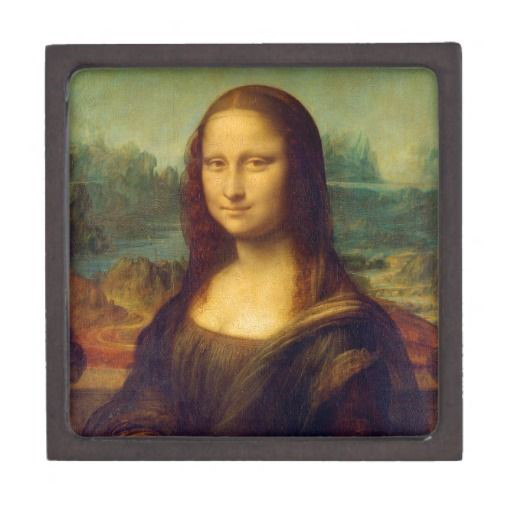

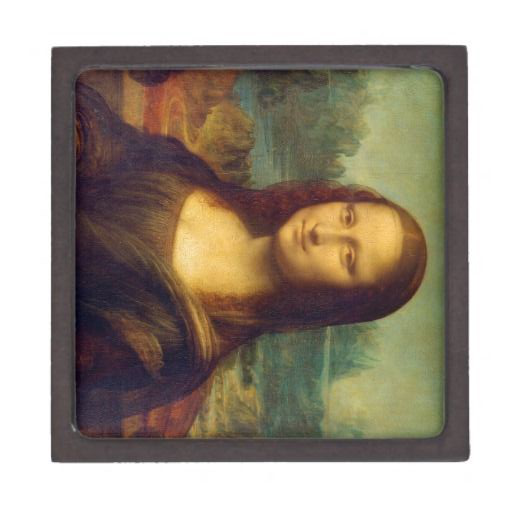

In [39]:
from PIL import Image
img = Image.open("Theme5_Algorithmique/data/joconde.jpg")
display(img) # image avant rotation
rotation(img)
display(img) # image après rotation

# Algorithmes de programmation dynamique

A venir

# Algorithmes de recherche textuelle

A venir

---
Germain BECKER & Sébastien POINT, Lycée Mounier, ANGERS 

![Licence Creative Commons](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)